Аппроксимировать таблично заданную функцию по методу наименьших квадратов, используя полиномы
Чебышева по 5 порядок включительно

In [ ]:
import numpy as np

In [ ]:
t=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
z=[5,6,8,10,12,13,12,10,8,10,8,11,7,9,11,10,9,12,11,6]
np.polynomial.chebyshev.chebfit(t,z,5)

array([ 2.69352448e+00,  1.59354460e+00,  2.01364554e-01, -2.82650359e-02,
        1.02893121e-03, -1.17543299e-05])

[[ 2.69352448e+00]
 [ 1.59354460e+00]
 [ 2.01364554e-01]
 [-2.82650359e-02]
 [ 1.02893121e-03]
 [-1.17543299e-05]]


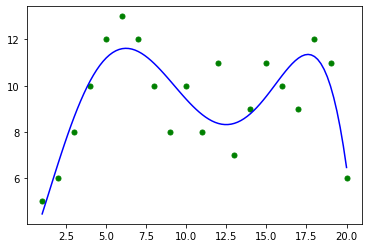

Сумма квадратов отклонений составила: 28.52497607655495


In [ ]:
from numpy import vstack
from numpy.linalg import lstsq
import matplotlib.pyplot as plt


def solve(x, y, n):
    def Cheb(n, x0):
        if n < 0:
            raise ValueError
        elif n == 0:
            return 1
        elif n == 1:
            return x0  
        return (2 * x0 * Cheb(n-1, x0) -  Cheb(n-2, x0))
    def f(C, x0):
        res = 0
        i = 0
        while i < len(C): 
            res += (float(C[i][0]) * Cheb(i, x0))
            i += 1
        return res
    
    F = []
    for x0 in x:
            F += [[Cheb(i, x0) for i in range(n+1)]]

    Y = vstack(y)
    C = lstsq(F, Y, rcond = None)[0]
    print(C)
    x1 = [i/5 + 1 for i in range(len(x) * 5 - 4)]
    y1 = [f(C, x0) for x0 in x1]
    _ = plt.plot(x, y, 'o', markersize=5, color="green")
    _ = plt.plot(x1, y1, 'r', color="blue")
    plt.show()
    res=0
    for dot in x1:
        if dot in x:
            res=res+(y[x.index(dot)]-y1[x1.index(dot)])**2
    print('Сумма квадратов отклонений составила:', res)


x = [i+1 for i in range(20)]
y = [5, 6, 8, 10, 12, 13, 12, 10, 8, 10, 8, 11, 7, 9, 11, 10, 9, 12, 11, 6]

solve(x, y, 5)